In [2]:
import pandas_datareader.data as web

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [0]:
import datetime

In [0]:
start=datetime.datetime(2018,1,1)
end=datetime.datetime(2020,4,1)

In [0]:
facebook=web.DataReader('FB','yahoo',start=start,end=end)

In [7]:
facebook.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,181.580002,177.550003,177.679993,181.419998,18151900,181.419998
2018-01-03,184.779999,181.330002,181.880005,184.669998,16886600,184.669998
2018-01-04,186.210007,184.100006,184.899994,184.330002,13880900,184.330002
2018-01-05,186.899994,184.929993,185.589996,186.850006,13574500,186.850006
2018-01-08,188.899994,186.330002,187.199997,188.279999,17994700,188.279999


In [0]:
amazon=web.DataReader('AMZN','yahoo',start,end)

In [10]:
amazon.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,1190.000000,1170.510010,1172.000000,1189.010010,2694500,1189.010010
2018-01-03,1205.489990,1188.300049,1188.300049,1204.199951,3108800,1204.199951
2018-01-04,1215.869995,1204.660034,1205.000000,1209.589966,3022100,1209.589966
2018-01-05,1229.140015,1210.000000,1217.510010,1229.140015,3544700,1229.140015
2018-01-08,1253.079956,1232.030029,1236.000000,1246.869995,4279500,1246.869995


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

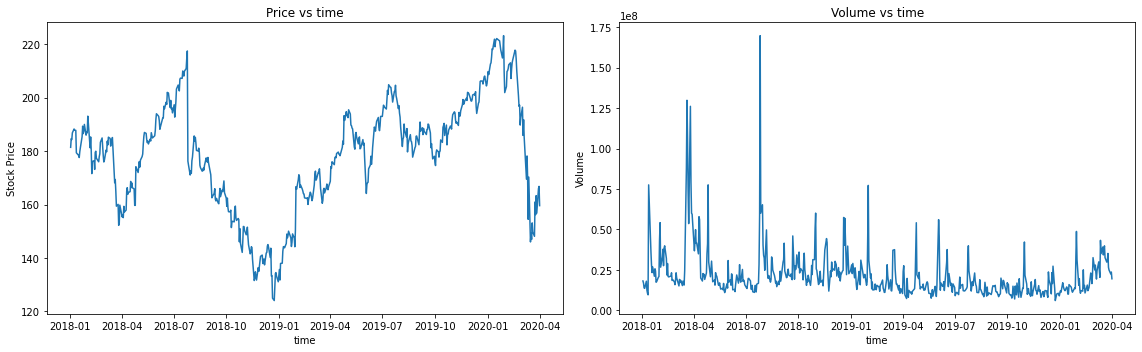

In [50]:
x=facebook.index
x1=amazon.index
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(16,5))
axes[0].plot(x,facebook['Close'])

axes[0].set_title('Price vs time')
axes[0].set_ylabel('Stock Price')
axes[0].set_xlabel('time')
axes[1].plot(x,facebook['Volume'],)

axes[1].set_title('Volume vs time')
axes[1].set_ylabel('Volume')
axes[1].set_xlabel('time')

plt.tight_layout()

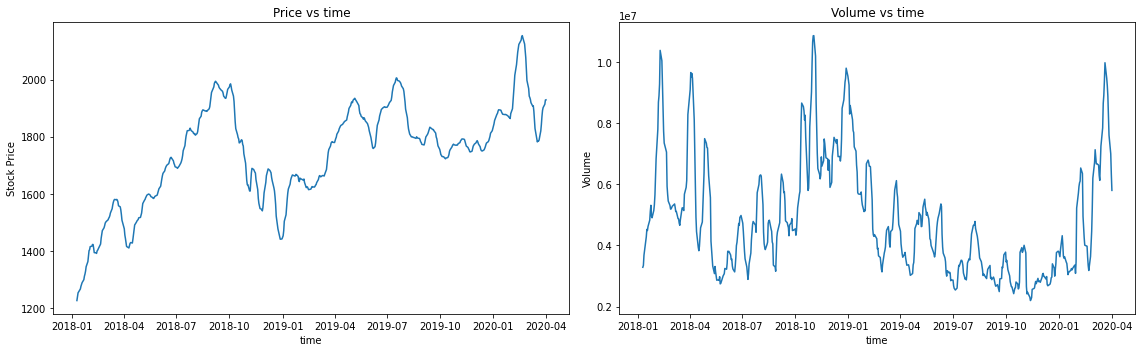

In [48]:
##for amazon.... #noise is removed by rolling window7
x1=amazon.index
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(16,5))
axes[0].plot(x1,amazon['Close'].rolling(window=7).mean())
axes[0].set_title('Price vs time')
axes[0].set_ylabel('Stock Price')
axes[0].set_xlabel('time')
axes[1].plot(x1,amazon['Volume'].rolling(window=7).mean())
axes[1].set_title('Volume vs time')
axes[1].set_ylabel('Volume')
axes[1].set_xlabel('time')
plt.tight_layout()

In [16]:
facebook.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2020-03-19', '2020-03-20', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-30',
               '2020-03-31', '2020-04-01'],
              dtype='datetime64[ns]', name='Date', length=566, freq=None)

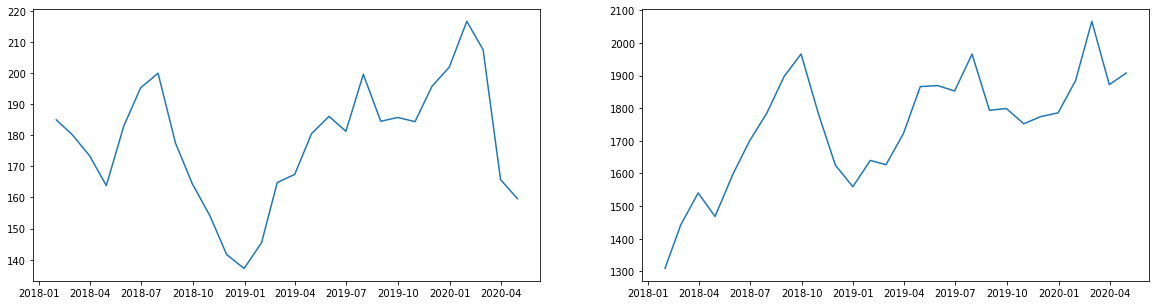

In [34]:
fig,axes=plt.subplots(1,2,figsize=(20,5))
axes[0].plot(facebook['Close'].resample('M').mean())
axes[1].plot(amazon['Close'].resample('M').mean())

In [0]:
#### Bollinder bands in stock trading
#close 20 Day Moding average
facebook['Close:20 day mean']=facebook['Close'].rolling(20).mean()
#upper band 20 MA+2*STDEV(20)
facebook['upper']=facebook['Close:20 day mean']+2*(facebook['Close'].rolling(20).std())
#lower band 20 MA-2*STDEV(20)
facebook['lower']=facebook['Close:20 day mean']-2*(facebook['Close'].rolling(20).std())


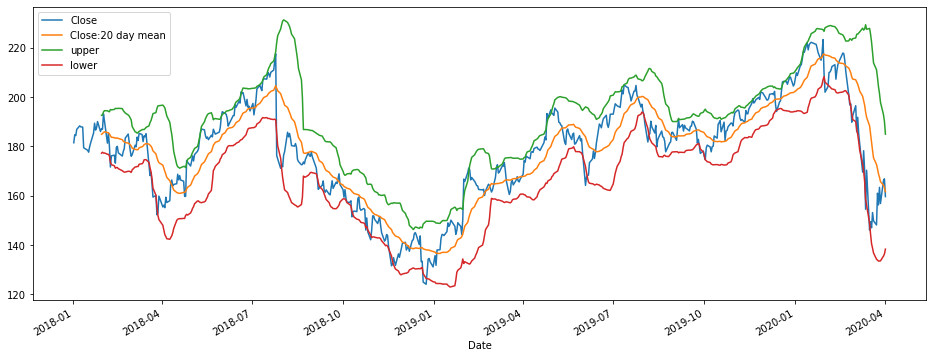

In [55]:
#plotting
facebook[['Close','Close:20 day mean','upper','lower']].plot(figsize=(16,6))